#Alunos

Pedro Dantas Leite - pdl@cesar.school

Paulo Célio Guerreiro Barboza Filho - pcgbf@cesar.school

Eduardo Vaz de Oliveira Gerab - evog@cesar.school

Matheus Nunes de Melo Barros - mnmb@cesar.school

# **Dnd Stats Dataset**

##**Dicionário de Dados**
| Coluna          | Descrição                                           | Valores          | Tipo de Dado                                            |
| ------------- | --------------------------------------------------- | ---------------- | ------------------------------------------------ |
| Race      | Nome da raca escolhida | valor alfanumerico | Nominal                    |
| Height        | Altura da raca escolhida | valor numerico | Qualitativo e Ordinal  |
| Weight           | Peso da raca escolhida | valor numerico | Qualitativo e Nominal                                                 |
| Strenght           | Valor base do atributo de forca da raca em questao na criacao de personagem | Valor numérico   | Numérico           |
| Dexterity         | Valor base do atributo de destreza da raca em questao na criacao de personagem | Valor numérico   | Qualitativo e Nominal                   |
| Constitution         | Valor base do atributo de constituicao da raca em questao na criacao de personagem | Valor numérico   | Qualitativo e Nominal                   |
| Intelligence        | Valor base do atributo de inteligencia da raca em questao na criacao de personagem | Valor alfanumérico | Literal |
| Wisdom          | Valor base do atributo de sabedoria da raca em questao na criacao de personagem | Valor numérico   | Numérico        |
| Charisma         | Valor base do atributo de carisma da raca em questao na criacao de personagem | Valor numérico | Literal  |
| Race-id | Enumeracao de Todas as Racas presentes no DataSet | Valor numérico | Numérico |

Link do Kaggle com o arquivo da base:

https://www.kaggle.com/datasets/andrewabeles/dnd-stats

# Analise de dados


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import statistics
from scipy.stats import f_oneway
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
# drive.mount('/content/gdrive')

In [ ]:
# df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Projeto/kobold.csv')
df = pd.read_csv('/content/stats.csv')

In [ ]:
df.head()

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,dragonborn,79,279,30,14,15,12,7,13,16
1,dragonborn,79,331,30,11,11,11,13,13,17
2,dragonborn,71,230,30,14,16,11,13,10,18
3,dragonborn,75,265,30,8,19,7,10,13,16
4,dragonborn,72,229,30,8,17,14,14,10,9


Aqui, acrescentamos uma coluna a mais no dataset, que enumera todas as 9 racas, para que ficasse mais facil a aplicacao do algoritmo k-NN.

In [ ]:
def identify(x):
  race_id = {
  'dragonborn':1,
  'halfling':2,
  'gnome':3,
  'human':4,
  'tiefling':5,
  'elf':6,
  'dwarf':7,
  'half.elf':8,
  'half.orc':9
  }
  return race_id[x]
df['race_id'] = df['race'].apply(lambda x : identify(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   race          10000 non-null  object
 1   height        10000 non-null  int64 
 2   weight        10000 non-null  int64 
 3   speed         10000 non-null  int64 
 4   strength      10000 non-null  int64 
 5   dexterity     10000 non-null  int64 
 6   constitution  10000 non-null  int64 
 7   intelligence  10000 non-null  int64 
 8   wisdom        10000 non-null  int64 
 9   charisma      10000 non-null  int64 
 10  race_id       10000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 859.5+ KB


In [ ]:
race_counts = df['race'].value_counts()

print(race_counts)

dragonborn    1144
halfling      1135
gnome         1121
human         1120
tiefling      1120
elf           1112
dwarf         1095
half.elf      1086
half.orc      1067
Name: race, dtype: int64


Para ter certeza de que o dataset não possui valores nulos em nennhuma de suas colunas:

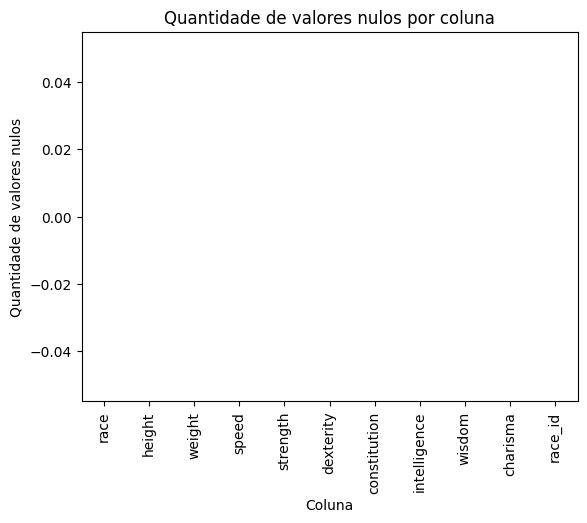

In [ ]:
# Conta a quantidade de valores nulos em cada coluna
null_counts = df.isnull().sum()

# Plota um gráfico de barras com a quantidade de valores nulos em cada coluna
null_counts.plot(kind='bar')

# Define o título do gráfico e dos eixos
plt.title('Quantidade de valores nulos por coluna')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de valores nulos')

# Exibe o gráfico
plt.show()

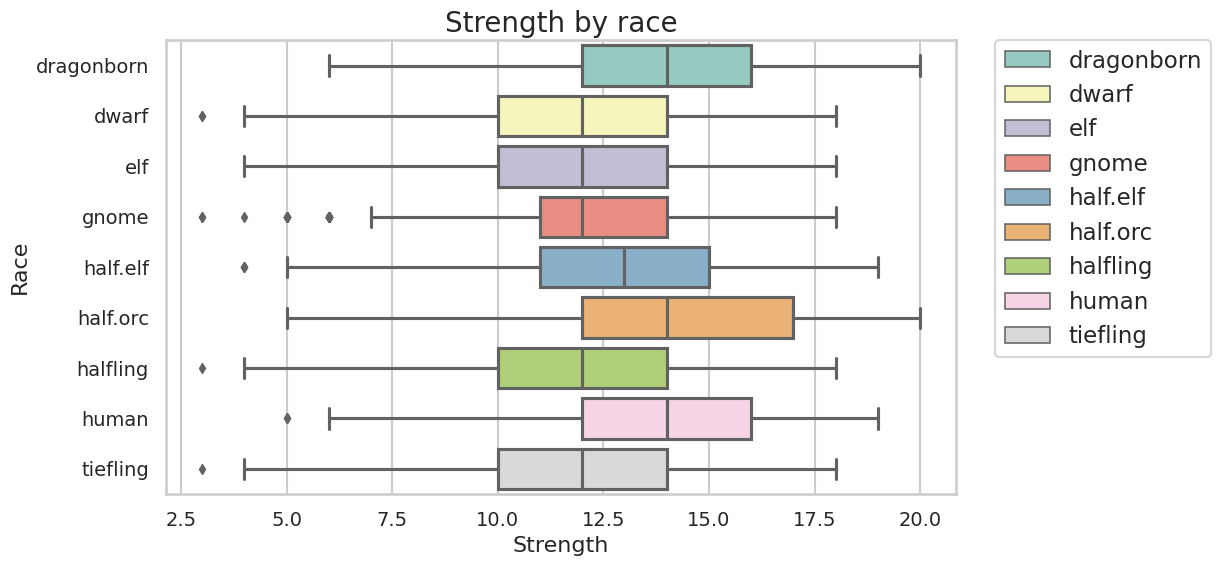

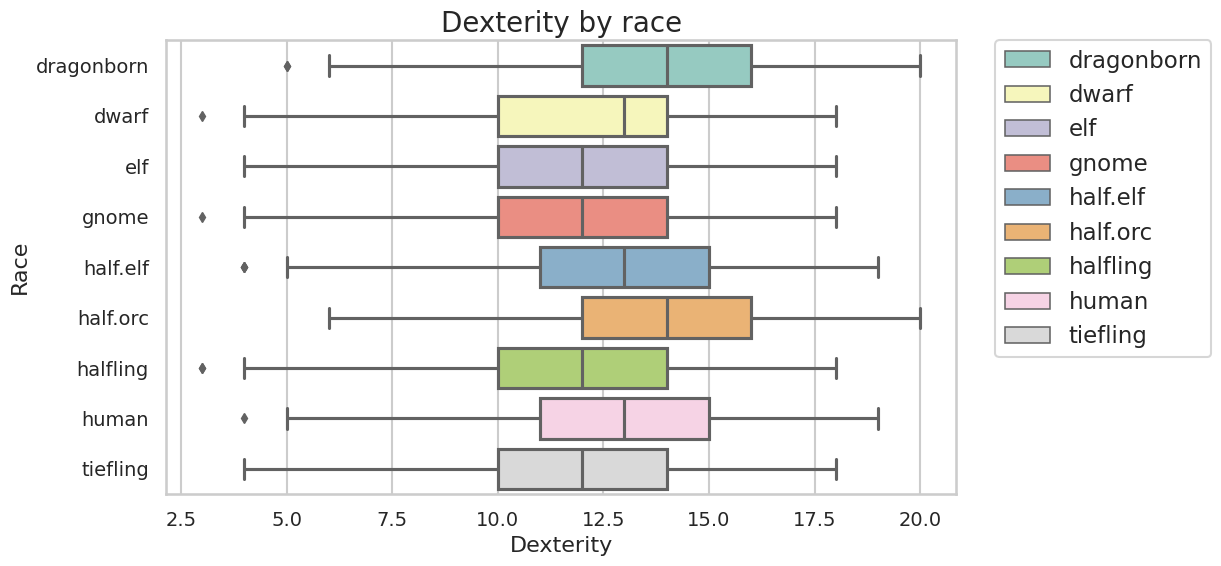

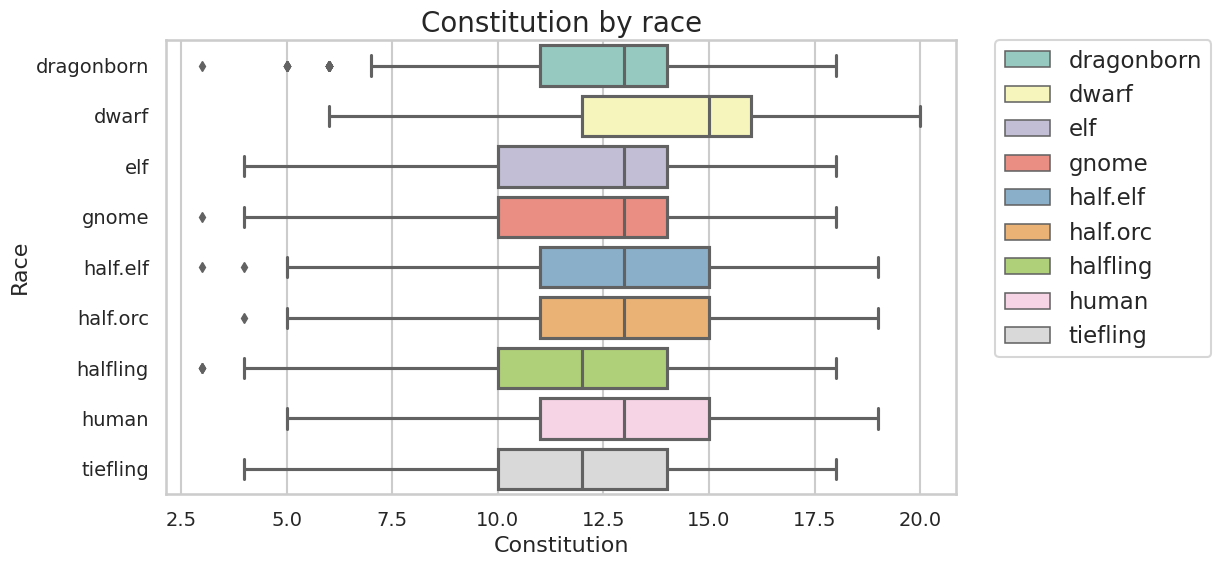

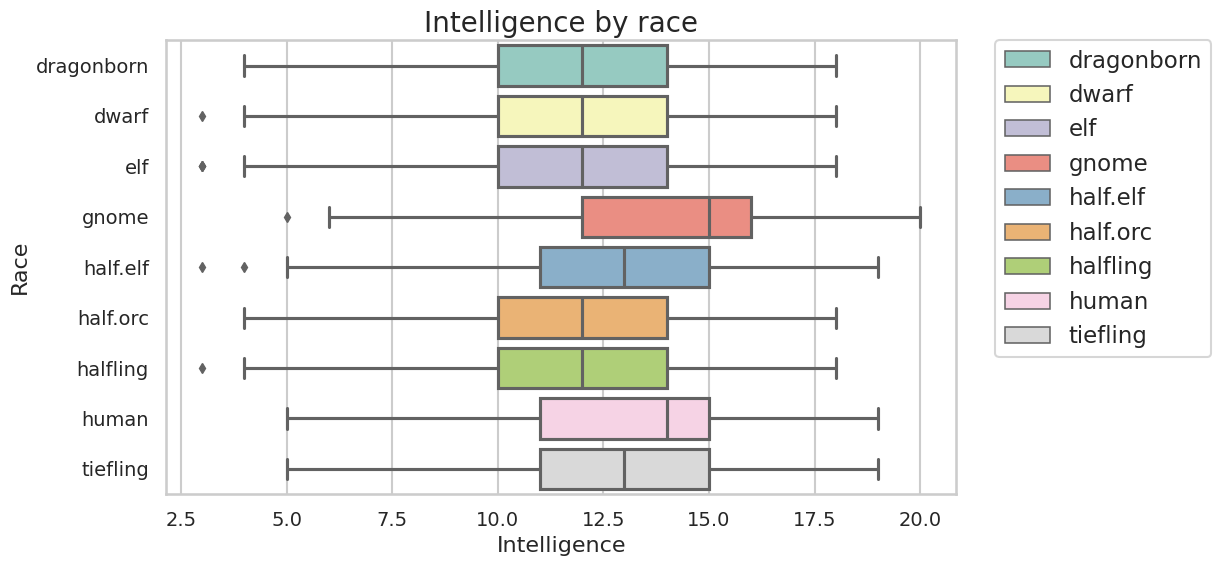

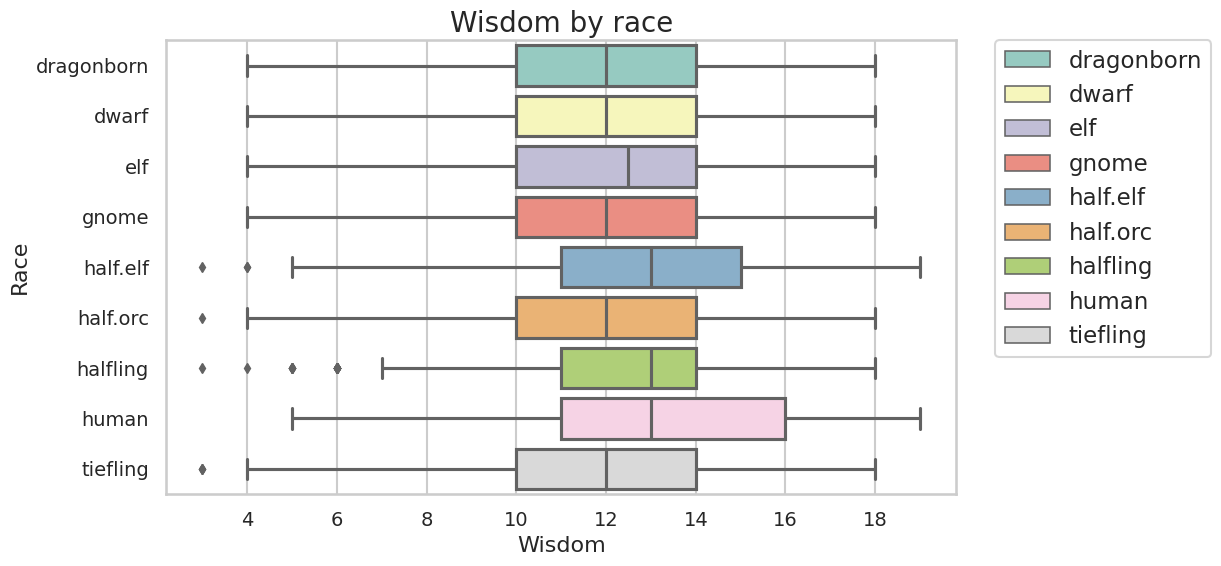

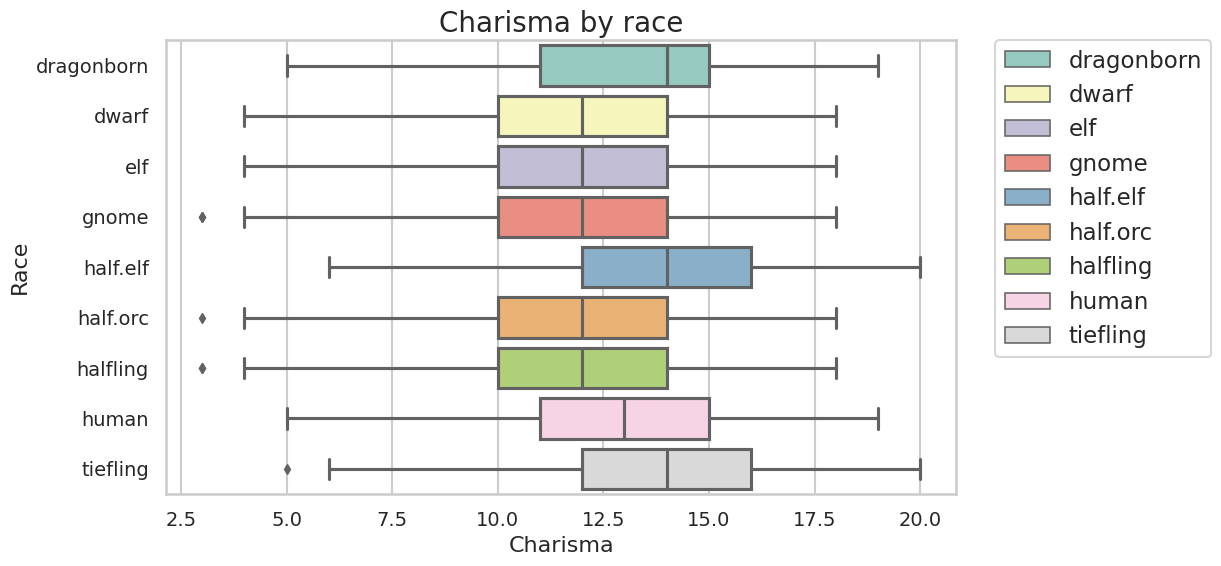

In [ ]:
# Set the style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create a list of attributes
attributes = ['strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']

# Loop through the attributes and create a boxplot with all races grouped inside
for attribute in attributes:
    plt.figure(figsize=(10, 6)) # Set the figure size
    sns.boxplot(x=attribute, y='race', hue='race', data=df, palette='Set3', dodge=False, orient='h')
    plt.title(f'{attribute.capitalize()} by race', fontsize=20)
    plt.xlabel(attribute.capitalize(), fontsize=16)
    plt.ylabel('Race', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Adjust the legend position
    plt.show()

Assim, junto com o conjunto de informações externas que já possuimos sobre as raças do jogo, podemos tem uma noção boa de como elas se comportam dentro do sistema do jogo (Eg. quais raças são mais fortes, ageis, etc...)

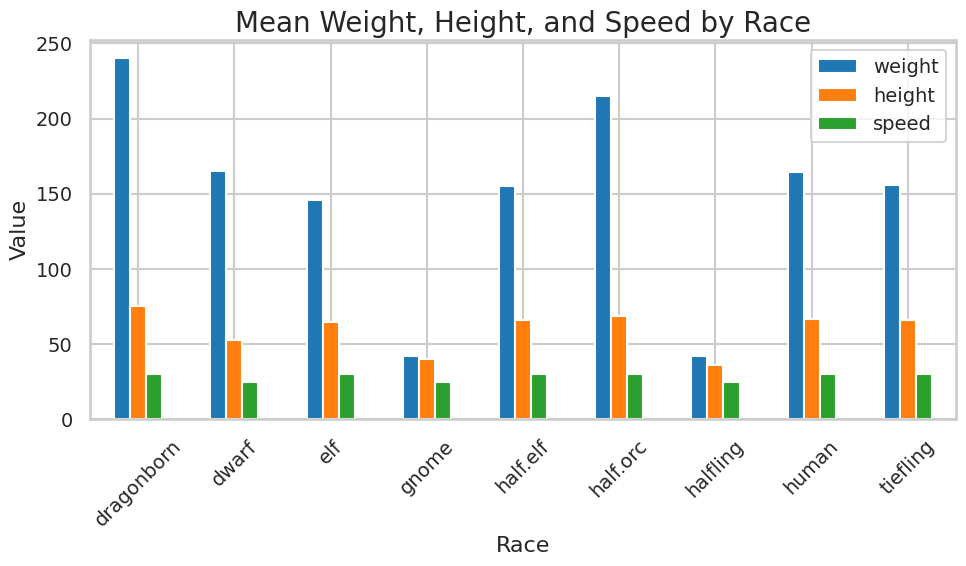

In [ ]:
# Group the DataFrame by race and calculate the mean weight, height, and speed for each race
race_stats = df.groupby('race')[['weight', 'height', 'speed']].mean()

# Create a bar graph of the mean weight, height, and speed for each race
race_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Weight, Height, and Speed by Race', fontsize=20)
plt.xlabel('Race', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

Além disso, informações de estatura servem para comparar melhor os atributos fisicos de cada raça.

##Matriz de Correlacao

Abaixo, foi feita uma matriz de correlacao para que fosse melhor analisar quais elementos do dataset tem uma correlacao alta.

<ipython-input-13-b16beb0b65d2>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


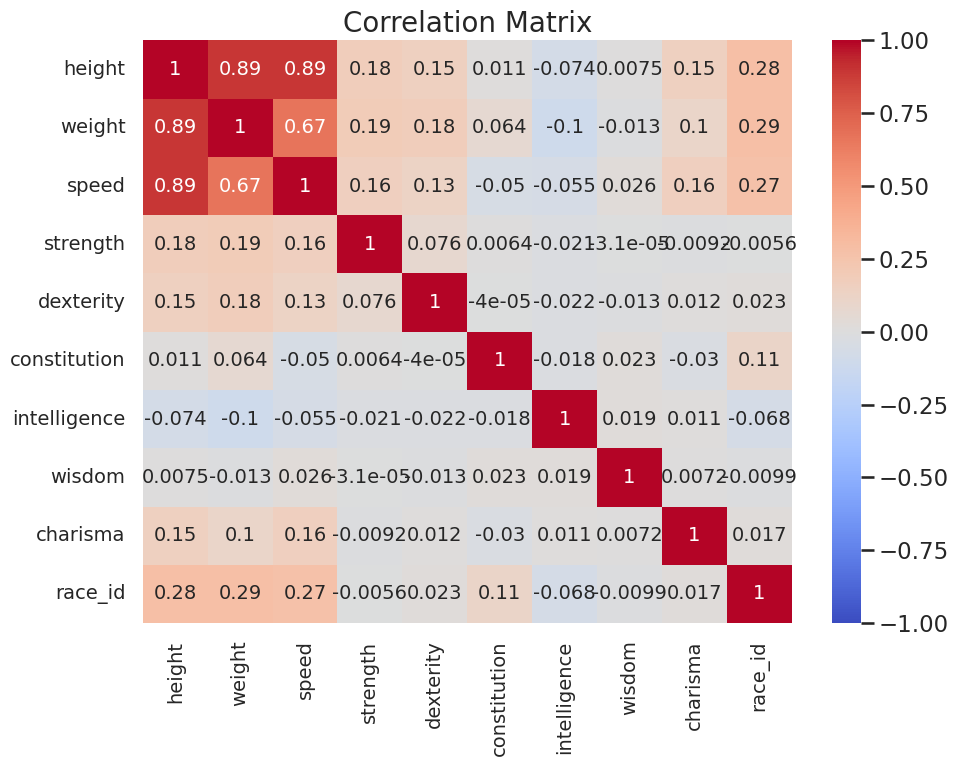

In [ ]:
# Set the style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax, annot_kws={"fontsize":14})
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

Apos plotarmos o heatmap, foi percebido uma correlacao alta (0.89) entre os valores de height (altura) e weight (peso), com o objetivo de verificar se realmente ha uma correlacao ou se e apenas uma causalidade, realizaremos a analise de variaveis dependentes.

##Analise de Variaveis Dependentes

In [ ]:
dep = 'height'
indep = 'weight'

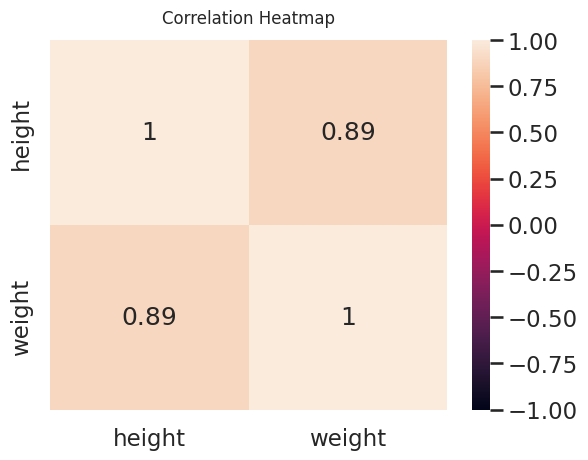

In [ ]:
heatmap = sns.heatmap(df[[dep,indep]].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df[dep].describe()

count    10000.000000
mean        59.597500
std         13.283107
min         33.000000
25%         52.000000
50%         64.000000
75%         69.000000
max         82.000000
Name: height, dtype: float64

In [ ]:
df[indep].describe()

count    10000.000000
mean       146.863500
std         68.304729
min         39.000000
25%        120.000000
50%        154.000000
75%        188.000000
max        367.000000
Name: weight, dtype: float64

Text(0.5, 0, 'height')

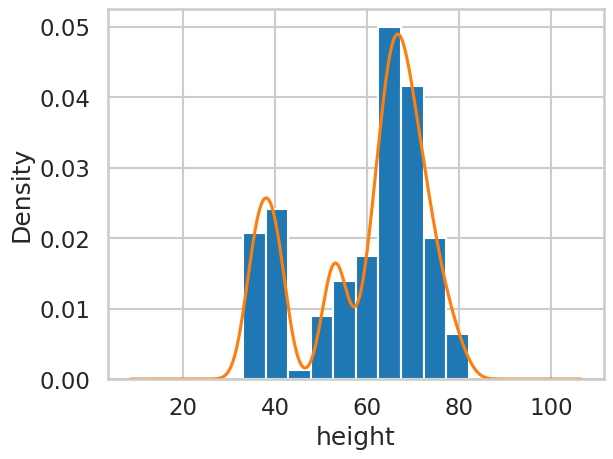

In [ ]:
ax = df[dep].plot.hist(density=True)
df[dep].plot.density(ax=ax)
ax.set_xlabel(dep)

Text(0.5, 0, 'weight')

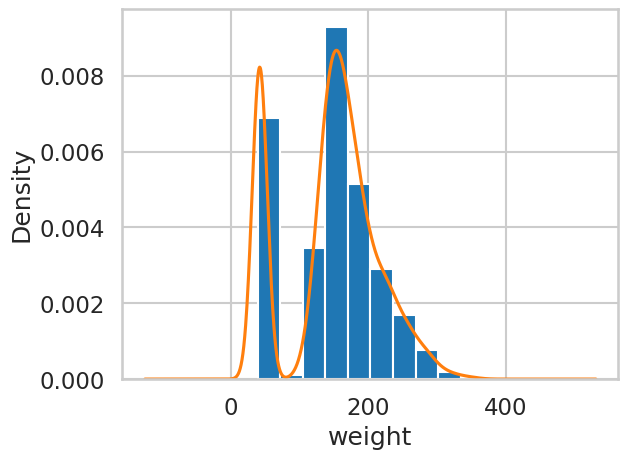

In [ ]:
ax = df[indep].plot.hist(density=True)
df[indep].plot.density(ax=ax)
ax.set_xlabel(indep)

(10000, 1) (10000, 1)


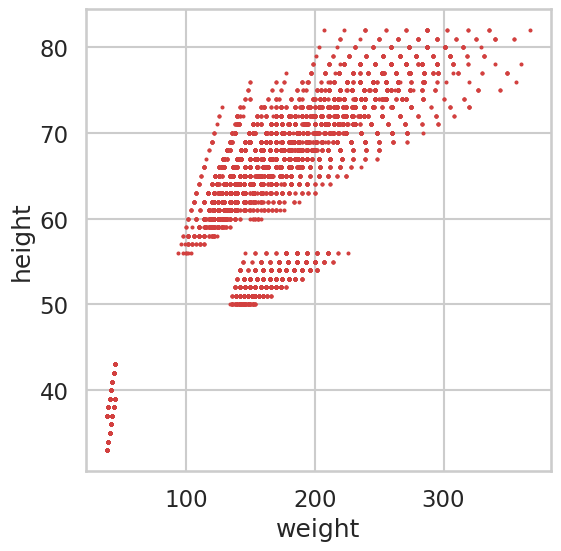

In [ ]:
x = df[indep].values.reshape(-1, 1)
y = df[dep].values.reshape(-1, 1)

print(x.shape, y.shape)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2, c='#d2403f')
plt.xlabel(indep)
plt.ylabel(dep)

plt.show()

Para analisar melhor os dados, dividimos os elementos em grupos A e B, onde o grupo A tem os valores de altura e o grupo B os valores de peso. Apos isso, pegamos 30% da base dos valores de ambos os grupos e fizemos as analises de distribuicao em cima destas bases de dados.

In [ ]:
grupoA = [5]*30
grupoB = [5]*30
mediaA = []
quantilA = []
mediaB = []
quantilB = []
for i in range (30):
  grupoA[i] = df[dep].sample(frac=0.3).dropna()
  grupoB[i] = df[indep].sample(frac=0.3).dropna()


  mediaA.append(grupoA[i].mean())
  quantilA.append(grupoA[i].quantile(0.9))

  mediaB.append(grupoB[i].mean())
  quantilB.append(grupoB[i].quantile(0.9))

stat=0.967, p=0.454
A média do grupo A provavelmente segue uma Distribuição Normal
stat=0.964, p=0.400
A média do grupo B provavelmente segue uma Distribuição Normal


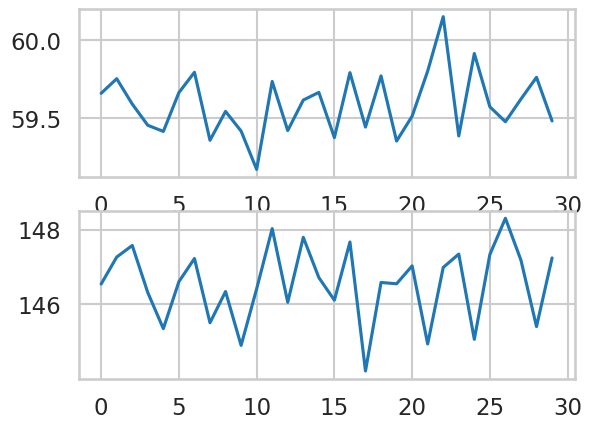

In [ ]:
plt.subplot(2,1,1)
plt.plot(mediaA)
data = mediaA
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('A média do grupo A provavelmente segue uma Distribuição Normal')
else:
	print('A média do grupo A provavelmente NÃO segue uma Distribuição Normal')

plt.subplot(2,1,2)
plt.plot(mediaB)
data = mediaB
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('A média do grupo B provavelmente segue uma Distribuição Normal')
else:
	print('A média do grupo B provavelmente NÃO segue uma Distribuição Normal')

plt.show()

In [ ]:
statistics.stdev(mediaA)

0.20484241209550239

In [ ]:
statistics.stdev(mediaB)

1.0157170280635943

stat=0.624, p=0.000
O percentil90 do grupo A provavelmente NÃO seguem uma Distribuição Normal
stat=0.075, p=0.693
As variáveis do grupo A Provavelmente são Independentes


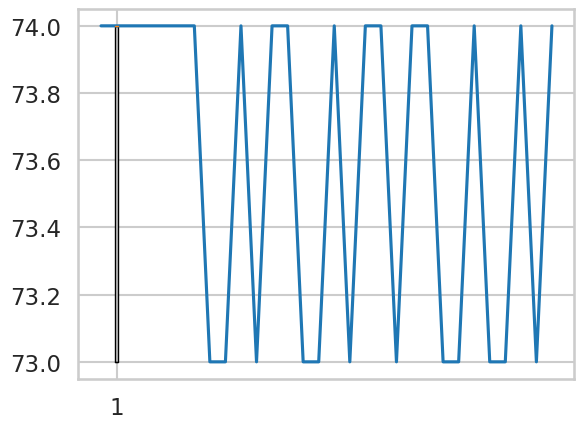

In [ ]:
plt.boxplot(quantilA)
plt.plot(quantilA)
data = quantilA
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('O percentil90 do grupo A provavelmente segue uma Distribuição Normal')
else:
	print('O percentil90 do grupo A provavelmente NÃO seguem uma Distribuição Normal')

data1 = quantilA
data2 = mediaA
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('As variáveis do grupo A Provavelmente são Independentes')
else:
	print('As variáveis do grupo A Provavelmente são Dependentes')

stat=0.724, p=0.000
As variáveis do grupo B provavelmente NÃO seguem uma Distribuição Normal
stat=0.309, p=0.096
As variáveis do grupo B são Provavelmente Independentes


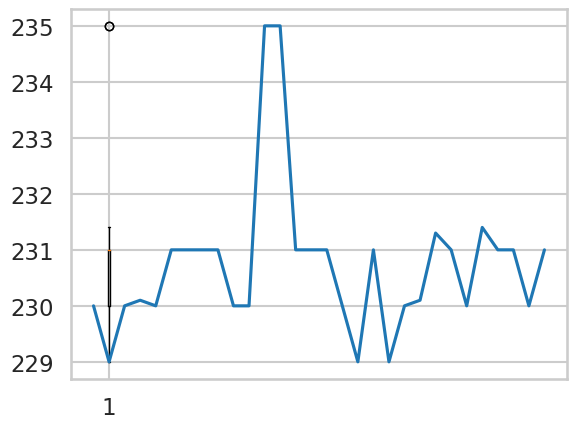

In [ ]:
plt.boxplot(quantilB)
plt.plot(quantilB)
data = quantilB
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('As variáveis do grupo B provavelmente seguem uma Distribuição Normal')
else:
	print('As variáveis do grupo B provavelmente NÃO seguem uma Distribuição Normal')

data1 = quantilB
data2 = mediaB
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('As variáveis do grupo B são Provavelmente Independentes')
else:
	print('As variáveis do grupo B são Provavelmente Dependentes')

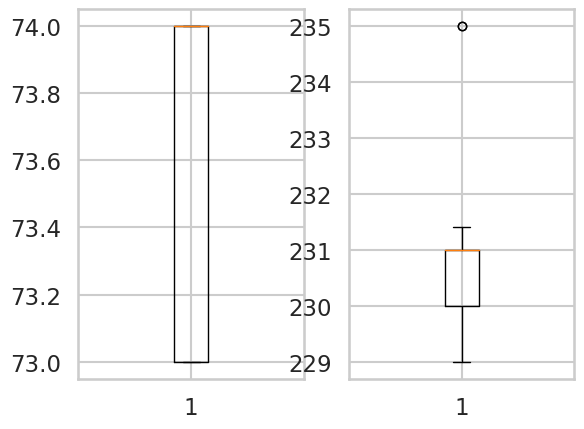

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(quantilA)
plt.subplot(1,2,2)
plt.boxplot(quantilB)
plt.show()

In [ ]:
stat, p = f_oneway(grupoA[0],grupoB[0])

# Imprimindo os resultados
print("Estatística de teste F: {:.3f}".format(stat))
print("valor-p: {:.3f}".format(p))

if p < 0.05:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística de teste F: 4735.556
valor-p: 0.000
Rejeitamos a hipótese nula.


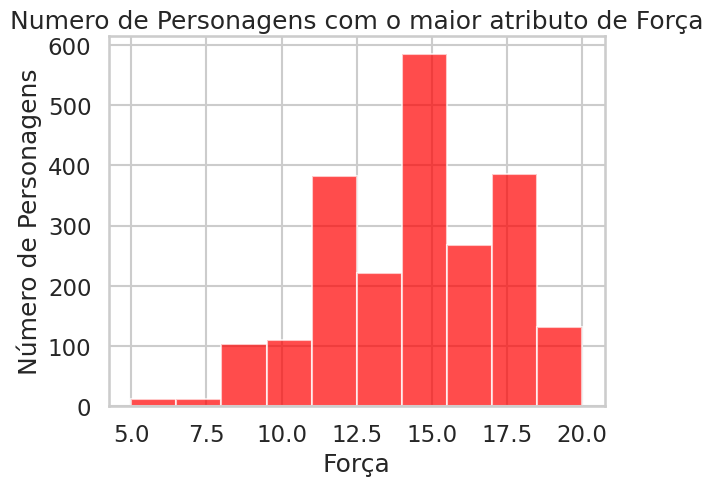

In [ ]:
# Encontre a raça com o maior atributo de força
max_forca = df['strength'].max()
racas_com_max_forca = df[df['strength'] == max_forca]['race']

# Filtrar o DataFrame para incluir apenas as raças com o maior atributo de força
df_racas_com_max_forca = df[df['race'].isin(racas_com_max_forca)]

# Plotar um histograma dos valores de força
plt.hist(df_racas_com_max_forca['strength'], bins=10, color='red', alpha=0.7)
plt.xlabel('Força')
plt.ylabel('Número de Personagens')
plt.title('Numero de Personagens com o maior atributo de Força')
plt.show()

Como pode ser visto atraves deste grafico, existem 600 personagens dos 10.000 neste dataset, para fins estatisticos apenas 6% da populacao total, que tem um valor base de 15 de força, que acaba sendo um requisito basico para classes voltadas para combate fisico, como guerreiro ou barbaro.

In [ ]:

df = df.dropna(subset=['race'])

race_mapping = {'dragonborn': 0, 'human': 1, 'tiefling': 2, 'halfling': 3, 'gnome': 4, 'dwarf': 5, 'elf': 6, 'half.elf': 7, 'half.orc': 8}
df['race'] = df['race'].map(race_mapping)

features = ['height', 'weight', 'speed']
target = 'race'

model_datase = df[features + [target]]

X = model_datase.drop(columns=[target])
y = model_datase[target].values


##Aplicacao do Algoritmo k-NN para prever a raca do personagem em questao

Com base na matriz de correlacao feita acima, a aplicacao do k-NN para a predicao da raca criada levou como base apenas height, speed e weight, ja que eram as caracteristicas com maior correlacao. Os atributos base das racas nao foram levados em conta.

k = 1, Acurácia: 84.50%
k = 3, Acurácia: 83.77%
k = 5, Acurácia: 82.50%
k = 7, Acurácia: 81.20%
k = 9, Acurácia: 79.90%
k = 11, Acurácia: 77.97%

Melhor valor de k: 1, Acurácia máxima: 84.50%



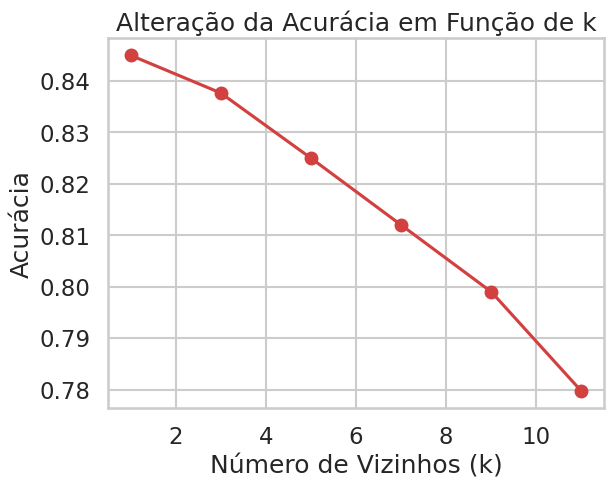

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

valores_de_k = [1, 3, 5, 7, 9, 11]

acuracias = []
melhor_k = None
melhor_acuracia = 0

for k in valores_de_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    acuracias.append(acuracia)

    if acuracia > melhor_acuracia:
        melhor_k = k
        melhor_acuracia = acuracia

    print(f'k = {k}, Acurácia: {acuracia * 100:.2f}%')

print(f'\nMelhor valor de k: {melhor_k}, Acurácia máxima: {melhor_acuracia * 100:.2f}%\n')

plt.plot(valores_de_k, acuracias, marker='o', c='#d2403f')
plt.title('Alteração da Acurácia em Função de k')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.show()

In [ ]:
# Gere o relatório de classificação
melhor_k = valores_de_k[acuracias.index(max(acuracias))]  # Encontra o melhor k com base na acurácia
knn = KNeighborsClassifier(n_neighbors=melhor_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred, target_names=race_mapping.keys())
print(f'Relatório de Classificação (melhor k = {melhor_k}):\n')
print(report)

Relatório de Classificação (melhor k = 1):

              precision    recall  f1-score   support

  dragonborn       0.97      0.94      0.96       363
       human       0.86      0.88      0.87       354
    tiefling       0.44      0.59      0.50       300
    halfling       1.00      1.00      1.00       335
       gnome       1.00      1.00      1.00       332
       dwarf       1.00      1.00      1.00       341
         elf       0.91      0.91      0.91       334
    half.elf       0.50      0.39      0.43       334
    half.orc       0.94      0.85      0.89       307

    accuracy                           0.84      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.85      0.84      0.85      3000



tendo em mente que o modelo tem uma taxa de recall muito baixa com relacao as racas tiefling e half elf, foi feita a matriz de confusao do modelo, para uma melhor visualizacao do que esta sendo errado e acertado pelo mesmo.

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

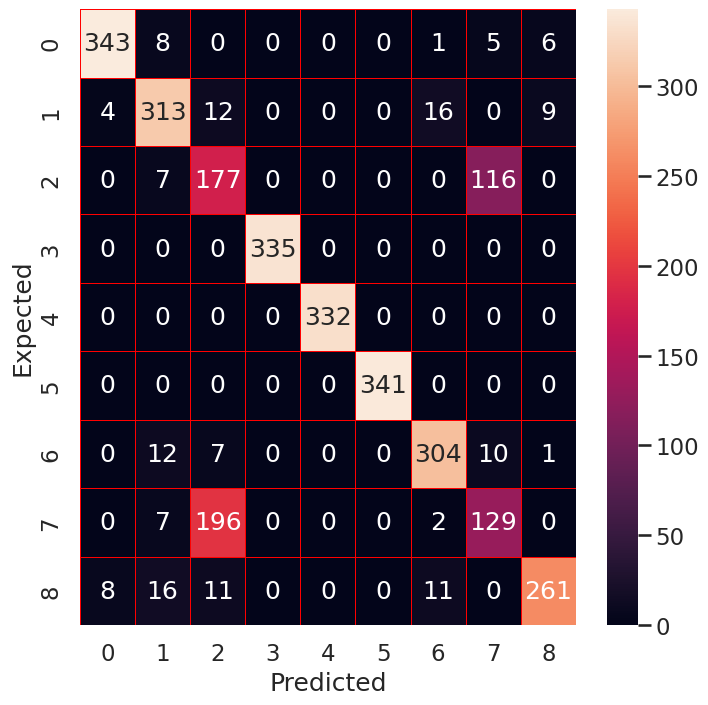

In [ ]:
#cm vizualization

import seaborn as sns
f, ax =plt.subplots(figsize = (8,8))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

##GridSearch

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

In [ ]:

features = ['height', 'weight', 'speed']
target = 'race'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score, average='weighted'),
               'precision':make_scorer(precision_score, average='weighted', zero_division=1),
               'f1':make_scorer(fbeta_score, average='weighted', beta = 1),
               'roc_auc': make_scorer(roc_auc_score, multi_class='ovr'),}

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier()),
])

param_grid = {
    'scaler' : [RobustScaler(),StandardScaler(),MinMaxScaler()],
    'classifier': [
                  LogisticRegression(
                      multi_class='multinomial',
                      solver='lbfgs',
                      max_iter=3000
                      ),
                  RandomForestClassifier(
                      # n_estimators=100,
                      max_depth=10
                      ),
                  GradientBoostingClassifier(
                      # n_estimators=100,
                      ),
                  DecisionTreeClassifier(
                      max_depth=5
                      ),
                  # XGBClassifier(objective='multiclass'),
                  LGBMClassifier(objective='multiclass',
                                #  max_depth=3
                                 ),
                  CatBoostClassifier(
                      iterations=100, depth=8
                      ),
                  ],
    # 'classifier__learning_rate': [0.01, 0.1, 1, 2]
}


grid_search = GridSearchCV(pipeline, param_grid, scoring=meus_scores, cv=5,refit='f1')

In [ ]:
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Melhor modelo: {best_model.named_steps['classifier']}")
print(f"Melhor normalizador: {best_model.named_steps['scaler']}")

y_pred = best_model.predict(X_test)
y_pred = y_pred.astype(int)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = fbeta_score(y_test, y_pred, average='weighted', beta=1)
# y_test_2d = np.reshape(y_test, (-1, 1))
# y_pred_2d = np.reshape(y_pred, (-1, 1))
# roc = roc_auc_score(y_test_2d, y_pred_2d,multi_class='ovr', average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
# print("ROC Score:", roc)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.197582
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.197582
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.226948
[LightGBM] [Info] Start training from score -2.197582
[LightGBM] [Info] Start training from score -2.231927
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.194372
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.181632
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.195975
[LightGBM] [Info] Start training from score -2.231927
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.213790
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.195975
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.197582
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.197582
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.226948
[LightGBM] [Info] Start training from score -2.197582
[LightGBM] [Info] Start training from score -2.231927
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.194372
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.181632
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.195975
[LightGBM] [Info] Start training from score -2.231927
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.213790
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.195975
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.197582
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.197582
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.226948
[LightGBM] [Info] Start training from score -2.197582
[LightGBM] [Info] Start training from score -2.231927
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.194372
[LightGBM] [Info] Start training from score -2.212157
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.181632
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.195975
[LightGBM] [Info] Start training from score -2.231927
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -2.192770
[LightGBM] [Info] Start training from score -2.213790
[LightGBM] [Info] Start training from score -2.144361
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.183216
[LightGBM] [Info] Start training from score -2.228605
[LightGBM] [Info] Start training from score -2.195975
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

Learning rate set to 0.5
0:	learn: 1.2674929	total: 5.84ms	remaining: 579ms
1:	learn: 1.1046683	total: 20ms	remaining: 979ms
2:	learn: 0.9830107	total: 33.8ms	remaining: 1.09s
3:	learn: 0.9280813	total: 41.2ms	remaining: 988ms
4:	learn: 0.9044110	total: 47.3ms	remaining: 898ms
5:	learn: 0.8769487	total: 61.3ms	remaining: 960ms
6:	learn: 0.8619628	total: 68.5ms	remaining: 910ms
7:	learn: 0.8454109	total: 82.3ms	remaining: 947ms
8:	learn: 0.8301773	total: 96.6ms	remaining: 977ms
9:	learn: 0.8191218	total: 111ms	remaining: 999ms
10:	learn: 0.8131669	total: 121ms	remaining: 977ms
11:	learn: 0.8116874	total: 126ms	remaining: 923ms
12:	learn: 0.8062568	total: 141ms	remaining: 945ms
13:	learn: 0.8030529	total: 148ms	remaining: 912ms
14:	learn: 0.7924072	total: 162ms	remaining: 919ms
15:	learn: 0.7869774	total: 176ms	remaining: 923ms
16:	learn: 0.7782020	total: 197ms	remaining: 960ms
17:	learn: 0.7648127	total: 214ms	remaining: 974ms
18:	learn: 0.7556254	total: 229ms	remaining: 974ms
19:	learn

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


12:	learn: 0.8005215	total: 155ms	remaining: 1.04s
13:	learn: 0.7943995	total: 170ms	remaining: 1.04s
14:	learn: 0.7889620	total: 188ms	remaining: 1.06s
15:	learn: 0.7825148	total: 205ms	remaining: 1.08s
16:	learn: 0.7800980	total: 219ms	remaining: 1.07s
17:	learn: 0.7740665	total: 235ms	remaining: 1.07s
18:	learn: 0.7653100	total: 249ms	remaining: 1.06s
19:	learn: 0.7559818	total: 262ms	remaining: 1.05s
20:	learn: 0.7454605	total: 278ms	remaining: 1.05s
21:	learn: 0.7379160	total: 293ms	remaining: 1.04s
22:	learn: 0.7358669	total: 307ms	remaining: 1.03s
23:	learn: 0.7231700	total: 322ms	remaining: 1.02s
24:	learn: 0.7146095	total: 336ms	remaining: 1.01s
25:	learn: 0.7102431	total: 355ms	remaining: 1.01s
26:	learn: 0.7060357	total: 378ms	remaining: 1.02s
27:	learn: 0.7008380	total: 392ms	remaining: 1.01s
28:	learn: 0.6966944	total: 406ms	remaining: 994ms
29:	learn: 0.6912478	total: 429ms	remaining: 1s
30:	learn: 0.6840726	total: 444ms	remaining: 988ms
31:	learn: 0.6676609	total: 458ms	

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


4:	learn: 0.8921751	total: 68.9ms	remaining: 1.31s
5:	learn: 0.8757020	total: 75.3ms	remaining: 1.18s
6:	learn: 0.8596380	total: 90.1ms	remaining: 1.2s
7:	learn: 0.8440252	total: 105ms	remaining: 1.2s
8:	learn: 0.8345476	total: 119ms	remaining: 1.2s
9:	learn: 0.8258054	total: 132ms	remaining: 1.19s
10:	learn: 0.8239804	total: 137ms	remaining: 1.11s
11:	learn: 0.8205530	total: 143ms	remaining: 1.05s
12:	learn: 0.8152870	total: 158ms	remaining: 1.05s
13:	learn: 0.8132187	total: 164ms	remaining: 1.01s
14:	learn: 0.8017022	total: 178ms	remaining: 1.01s
15:	learn: 0.8004430	total: 183ms	remaining: 959ms
16:	learn: 0.7909100	total: 200ms	remaining: 976ms
17:	learn: 0.7875315	total: 214ms	remaining: 976ms
18:	learn: 0.7757374	total: 228ms	remaining: 974ms
19:	learn: 0.7694951	total: 247ms	remaining: 987ms
20:	learn: 0.7591273	total: 261ms	remaining: 980ms
21:	learn: 0.7576368	total: 279ms	remaining: 988ms
22:	learn: 0.7524332	total: 293ms	remaining: 981ms
23:	learn: 0.7395766	total: 308ms	rem

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


1:	learn: 1.1229239	total: 23ms	remaining: 1.13s
2:	learn: 0.9894944	total: 38.6ms	remaining: 1.25s
3:	learn: 0.9332650	total: 45.8ms	remaining: 1.1s
4:	learn: 0.8888365	total: 61.4ms	remaining: 1.17s
5:	learn: 0.8770462	total: 68.1ms	remaining: 1.07s
6:	learn: 0.8620830	total: 77.7ms	remaining: 1.03s
7:	learn: 0.8455939	total: 91.4ms	remaining: 1.05s
8:	learn: 0.8431353	total: 95.4ms	remaining: 965ms
9:	learn: 0.8366115	total: 109ms	remaining: 985ms
10:	learn: 0.8326142	total: 117ms	remaining: 945ms
11:	learn: 0.8273743	total: 127ms	remaining: 929ms
12:	learn: 0.8160558	total: 141ms	remaining: 943ms
13:	learn: 0.8087089	total: 156ms	remaining: 961ms
14:	learn: 0.8000090	total: 166ms	remaining: 943ms
15:	learn: 0.7964805	total: 180ms	remaining: 947ms
16:	learn: 0.7808407	total: 199ms	remaining: 974ms
17:	learn: 0.7732318	total: 214ms	remaining: 973ms
18:	learn: 0.7637967	total: 234ms	remaining: 996ms
19:	learn: 0.7577306	total: 248ms	remaining: 994ms
20:	learn: 0.7433552	total: 263ms	r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


Learning rate set to 0.5
0:	learn: 1.2724559	total: 6.25ms	remaining: 619ms
1:	learn: 1.1236344	total: 20.4ms	remaining: 1s
2:	learn: 1.0381712	total: 34.5ms	remaining: 1.12s
3:	learn: 0.9702812	total: 42.2ms	remaining: 1.01s
4:	learn: 0.9428901	total: 48.2ms	remaining: 916ms
5:	learn: 0.8962074	total: 62.5ms	remaining: 979ms
6:	learn: 0.8836341	total: 68ms	remaining: 903ms
7:	learn: 0.8728239	total: 82.7ms	remaining: 951ms
8:	learn: 0.8624320	total: 90ms	remaining: 910ms
9:	learn: 0.8465116	total: 105ms	remaining: 942ms
10:	learn: 0.8410975	total: 110ms	remaining: 889ms
11:	learn: 0.8373679	total: 120ms	remaining: 878ms
12:	learn: 0.8276470	total: 134ms	remaining: 898ms
13:	learn: 0.8220986	total: 148ms	remaining: 911ms
14:	learn: 0.8129434	total: 163ms	remaining: 921ms
15:	learn: 0.8079074	total: 177ms	remaining: 928ms
16:	learn: 0.7992840	total: 195ms	remaining: 951ms
17:	learn: 0.7906496	total: 214ms	remaining: 973ms
18:	learn: 0.7820696	total: 228ms	remaining: 970ms
19:	learn: 0.7

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


13:	learn: 0.8030529	total: 159ms	remaining: 974ms
14:	learn: 0.7924072	total: 173ms	remaining: 982ms
15:	learn: 0.7869774	total: 191ms	remaining: 1s
16:	learn: 0.7782020	total: 208ms	remaining: 1.01s
17:	learn: 0.7648127	total: 222ms	remaining: 1.01s
18:	learn: 0.7556254	total: 237ms	remaining: 1.01s
19:	learn: 0.7519380	total: 251ms	remaining: 1s
20:	learn: 0.7504156	total: 266ms	remaining: 1000ms
21:	learn: 0.7380940	total: 280ms	remaining: 993ms
22:	learn: 0.7295732	total: 294ms	remaining: 985ms
23:	learn: 0.7262616	total: 308ms	remaining: 976ms
24:	learn: 0.7198245	total: 323ms	remaining: 968ms
25:	learn: 0.7084828	total: 337ms	remaining: 959ms
26:	learn: 0.6943012	total: 351ms	remaining: 949ms
27:	learn: 0.6867622	total: 370ms	remaining: 950ms
28:	learn: 0.6776412	total: 388ms	remaining: 950ms
29:	learn: 0.6735755	total: 408ms	remaining: 951ms
30:	learn: 0.6671567	total: 425ms	remaining: 947ms
31:	learn: 0.6623734	total: 441ms	remaining: 937ms
32:	learn: 0.6500414	total: 455ms	re

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


6:	learn: 0.8501063	total: 87.3ms	remaining: 1.16s
7:	learn: 0.8411773	total: 101ms	remaining: 1.16s
8:	learn: 0.8266372	total: 115ms	remaining: 1.17s
9:	learn: 0.8218823	total: 121ms	remaining: 1.08s
10:	learn: 0.8150676	total: 130ms	remaining: 1.05s
11:	learn: 0.8120085	total: 136ms	remaining: 999ms
12:	learn: 0.8005215	total: 155ms	remaining: 1.03s
13:	learn: 0.7943995	total: 169ms	remaining: 1.04s
14:	learn: 0.7889620	total: 186ms	remaining: 1.05s
15:	learn: 0.7825148	total: 201ms	remaining: 1.06s
16:	learn: 0.7800980	total: 216ms	remaining: 1.05s
17:	learn: 0.7740665	total: 229ms	remaining: 1.04s
18:	learn: 0.7653100	total: 244ms	remaining: 1.04s
19:	learn: 0.7559818	total: 258ms	remaining: 1.03s
20:	learn: 0.7454605	total: 272ms	remaining: 1.02s
21:	learn: 0.7379160	total: 291ms	remaining: 1.03s
22:	learn: 0.7358669	total: 306ms	remaining: 1.02s
23:	learn: 0.7231700	total: 320ms	remaining: 1.01s
24:	learn: 0.7146095	total: 334ms	remaining: 1s
25:	learn: 0.7102431	total: 348ms	rem

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


5:	learn: 0.8757020	total: 118ms	remaining: 1.85s
6:	learn: 0.8596380	total: 137ms	remaining: 1.81s
7:	learn: 0.8440252	total: 164ms	remaining: 1.88s
8:	learn: 0.8345476	total: 188ms	remaining: 1.9s
9:	learn: 0.8258054	total: 216ms	remaining: 1.94s
10:	learn: 0.8239804	total: 226ms	remaining: 1.82s
11:	learn: 0.8205530	total: 241ms	remaining: 1.77s
12:	learn: 0.8152870	total: 267ms	remaining: 1.78s
13:	learn: 0.8132187	total: 280ms	remaining: 1.72s
14:	learn: 0.8017022	total: 308ms	remaining: 1.74s
15:	learn: 0.8004430	total: 322ms	remaining: 1.69s
16:	learn: 0.7909100	total: 348ms	remaining: 1.7s
17:	learn: 0.7875315	total: 374ms	remaining: 1.7s
18:	learn: 0.7757374	total: 401ms	remaining: 1.71s
19:	learn: 0.7694951	total: 428ms	remaining: 1.71s
20:	learn: 0.7591273	total: 454ms	remaining: 1.71s
21:	learn: 0.7576368	total: 481ms	remaining: 1.7s
22:	learn: 0.7524332	total: 508ms	remaining: 1.7s
23:	learn: 0.7395766	total: 546ms	remaining: 1.73s
24:	learn: 0.7316500	total: 569ms	remaini

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


Learning rate set to 0.5
0:	learn: 1.2721072	total: 12.9ms	remaining: 1.28s
1:	learn: 1.1229239	total: 35.1ms	remaining: 1.72s
2:	learn: 0.9894944	total: 55.9ms	remaining: 1.81s
3:	learn: 0.9332650	total: 70.9ms	remaining: 1.7s
4:	learn: 0.8888365	total: 86ms	remaining: 1.63s
5:	learn: 0.8770462	total: 90.7ms	remaining: 1.42s
6:	learn: 0.8620830	total: 101ms	remaining: 1.34s
7:	learn: 0.8455939	total: 123ms	remaining: 1.42s
8:	learn: 0.8431353	total: 129ms	remaining: 1.3s
9:	learn: 0.8366115	total: 143ms	remaining: 1.29s
10:	learn: 0.8326142	total: 151ms	remaining: 1.22s
11:	learn: 0.8273743	total: 161ms	remaining: 1.18s
12:	learn: 0.8160558	total: 180ms	remaining: 1.2s
13:	learn: 0.8087089	total: 202ms	remaining: 1.24s
14:	learn: 0.8000090	total: 213ms	remaining: 1.21s
15:	learn: 0.7964805	total: 227ms	remaining: 1.19s
16:	learn: 0.7808407	total: 242ms	remaining: 1.18s
17:	learn: 0.7732318	total: 256ms	remaining: 1.17s
18:	learn: 0.7637967	total: 272ms	remaining: 1.16s
19:	learn: 0.75

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


9:	learn: 0.8465116	total: 114ms	remaining: 1.03s
10:	learn: 0.8410975	total: 120ms	remaining: 969ms
11:	learn: 0.8373679	total: 130ms	remaining: 953ms
12:	learn: 0.8276470	total: 144ms	remaining: 967ms
13:	learn: 0.8220986	total: 163ms	remaining: 999ms
14:	learn: 0.8129434	total: 178ms	remaining: 1.01s
15:	learn: 0.8079074	total: 196ms	remaining: 1.03s
16:	learn: 0.7992840	total: 211ms	remaining: 1.03s
17:	learn: 0.7906496	total: 225ms	remaining: 1.02s
18:	learn: 0.7820696	total: 239ms	remaining: 1.02s
19:	learn: 0.7724173	total: 260ms	remaining: 1.04s
20:	learn: 0.7677354	total: 275ms	remaining: 1.03s
21:	learn: 0.7580044	total: 290ms	remaining: 1.03s
22:	learn: 0.7489519	total: 304ms	remaining: 1.02s
23:	learn: 0.7423748	total: 325ms	remaining: 1.03s
24:	learn: 0.7311462	total: 339ms	remaining: 1.02s
25:	learn: 0.7205472	total: 356ms	remaining: 1.01s
26:	learn: 0.7105595	total: 370ms	remaining: 1s
27:	learn: 0.7057672	total: 384ms	remaining: 988ms
28:	learn: 0.6957212	total: 398ms	r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


5:	learn: 0.8769487	total: 70.7ms	remaining: 1.11s
6:	learn: 0.8619628	total: 83.8ms	remaining: 1.11s
7:	learn: 0.8454109	total: 97.9ms	remaining: 1.13s
8:	learn: 0.8301773	total: 112ms	remaining: 1.13s
9:	learn: 0.8191218	total: 126ms	remaining: 1.14s
10:	learn: 0.8131669	total: 136ms	remaining: 1.1s
11:	learn: 0.8116874	total: 142ms	remaining: 1.04s
12:	learn: 0.8062568	total: 156ms	remaining: 1.04s
13:	learn: 0.8030529	total: 163ms	remaining: 1s
14:	learn: 0.7924072	total: 177ms	remaining: 1s
15:	learn: 0.7869774	total: 197ms	remaining: 1.03s
16:	learn: 0.7782020	total: 212ms	remaining: 1.03s
17:	learn: 0.7648127	total: 232ms	remaining: 1.06s
18:	learn: 0.7556254	total: 246ms	remaining: 1.05s
19:	learn: 0.7519380	total: 261ms	remaining: 1.04s
20:	learn: 0.7504156	total: 280ms	remaining: 1.05s
21:	learn: 0.7380940	total: 296ms	remaining: 1.05s
22:	learn: 0.7295732	total: 310ms	remaining: 1.04s
23:	learn: 0.7262616	total: 324ms	remaining: 1.03s
24:	learn: 0.7198245	total: 338ms	remain

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


1:	learn: 1.1194432	total: 27.5ms	remaining: 1.35s
2:	learn: 1.0317010	total: 43.2ms	remaining: 1.4s
3:	learn: 0.9161987	total: 60.7ms	remaining: 1.46s
4:	learn: 0.8819497	total: 75.2ms	remaining: 1.43s
5:	learn: 0.8649740	total: 81.3ms	remaining: 1.27s
6:	learn: 0.8501063	total: 95.9ms	remaining: 1.27s
7:	learn: 0.8411773	total: 110ms	remaining: 1.27s
8:	learn: 0.8266372	total: 126ms	remaining: 1.27s
9:	learn: 0.8218823	total: 131ms	remaining: 1.18s
10:	learn: 0.8150676	total: 141ms	remaining: 1.14s
11:	learn: 0.8120085	total: 147ms	remaining: 1.08s
12:	learn: 0.8005215	total: 162ms	remaining: 1.08s
13:	learn: 0.7943995	total: 176ms	remaining: 1.08s
14:	learn: 0.7889620	total: 195ms	remaining: 1.1s
15:	learn: 0.7825148	total: 210ms	remaining: 1.1s
16:	learn: 0.7800980	total: 226ms	remaining: 1.1s
17:	learn: 0.7740665	total: 243ms	remaining: 1.11s
18:	learn: 0.7653100	total: 258ms	remaining: 1.1s
19:	learn: 0.7559818	total: 272ms	remaining: 1.09s
20:	learn: 0.7454605	total: 287ms	remai

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


7:	learn: 0.8440252	total: 109ms	remaining: 1.25s
8:	learn: 0.8345476	total: 129ms	remaining: 1.3s
9:	learn: 0.8258054	total: 144ms	remaining: 1.3s
10:	learn: 0.8239804	total: 149ms	remaining: 1.21s
11:	learn: 0.8205530	total: 155ms	remaining: 1.14s
12:	learn: 0.8152870	total: 170ms	remaining: 1.14s
13:	learn: 0.8132187	total: 190ms	remaining: 1.17s
14:	learn: 0.8017022	total: 206ms	remaining: 1.17s
15:	learn: 0.8004430	total: 211ms	remaining: 1.1s
16:	learn: 0.7909100	total: 225ms	remaining: 1.1s
17:	learn: 0.7875315	total: 240ms	remaining: 1.09s
18:	learn: 0.7757374	total: 256ms	remaining: 1.09s
19:	learn: 0.7694951	total: 270ms	remaining: 1.08s
20:	learn: 0.7591273	total: 285ms	remaining: 1.07s
21:	learn: 0.7576368	total: 299ms	remaining: 1.06s
22:	learn: 0.7524332	total: 325ms	remaining: 1.09s
23:	learn: 0.7395766	total: 341ms	remaining: 1.08s
24:	learn: 0.7316500	total: 355ms	remaining: 1.06s
25:	learn: 0.7248793	total: 369ms	remaining: 1.05s
26:	learn: 0.7237537	total: 384ms	rema

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


1:	learn: 1.1229239	total: 23.7ms	remaining: 1.16s
2:	learn: 0.9894944	total: 38.2ms	remaining: 1.24s
3:	learn: 0.9332650	total: 46.8ms	remaining: 1.12s
4:	learn: 0.8888365	total: 61.1ms	remaining: 1.16s
5:	learn: 0.8770462	total: 72.2ms	remaining: 1.13s
6:	learn: 0.8620830	total: 81.9ms	remaining: 1.09s
7:	learn: 0.8455939	total: 96.3ms	remaining: 1.11s
8:	learn: 0.8431353	total: 101ms	remaining: 1.02s
9:	learn: 0.8366115	total: 115ms	remaining: 1.03s
10:	learn: 0.8326142	total: 123ms	remaining: 991ms
11:	learn: 0.8273743	total: 133ms	remaining: 972ms
12:	learn: 0.8160558	total: 149ms	remaining: 994ms
13:	learn: 0.8087089	total: 163ms	remaining: 1s
14:	learn: 0.8000090	total: 173ms	remaining: 979ms
15:	learn: 0.7964805	total: 193ms	remaining: 1.01s
16:	learn: 0.7808407	total: 207ms	remaining: 1.01s
17:	learn: 0.7732318	total: 221ms	remaining: 1.01s
18:	learn: 0.7637967	total: 238ms	remaining: 1.01s
19:	learn: 0.7577306	total: 252ms	remaining: 1.01s
20:	learn: 0.7433552	total: 266ms	re

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(


12:	learn: 0.8276470	total: 149ms	remaining: 1s
13:	learn: 0.8220986	total: 164ms	remaining: 1.01s
14:	learn: 0.8129434	total: 179ms	remaining: 1.02s
15:	learn: 0.8079074	total: 200ms	remaining: 1.05s
16:	learn: 0.7992840	total: 217ms	remaining: 1.06s
17:	learn: 0.7906496	total: 231ms	remaining: 1.05s
18:	learn: 0.7820696	total: 246ms	remaining: 1.05s
19:	learn: 0.7724173	total: 260ms	remaining: 1.04s
20:	learn: 0.7677354	total: 275ms	remaining: 1.03s
21:	learn: 0.7580044	total: 289ms	remaining: 1.02s
22:	learn: 0.7489519	total: 304ms	remaining: 1.02s
23:	learn: 0.7423748	total: 319ms	remaining: 1.01s
24:	learn: 0.7311462	total: 333ms	remaining: 999ms
25:	learn: 0.7205472	total: 352ms	remaining: 1s
26:	learn: 0.7105595	total: 367ms	remaining: 991ms
27:	learn: 0.7057672	total: 381ms	remaining: 980ms
28:	learn: 0.6957212	total: 396ms	remaining: 969ms
29:	learn: 0.6877338	total: 413ms	remaining: 963ms
30:	learn: 0.6806748	total: 428ms	remaining: 952ms
31:	learn: 0.6710168	total: 442ms	rem

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 639, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

  warnings.warn(
/usr/lo

Melhor modelo: LGBMClassifier(objective='multiclass')
Melhor normalizador: RobustScaler()
Accuracy: 0.8453333333333334
Recall: 0.8453333333333334
Precision: 0.8466461764550425
F1 Score: 0.8434954689958849


In [ ]:
pd.DataFrame(grid_search.cv_results_)[['params',
                                  'mean_test_recall',
                                  'mean_test_precision',
                                  'mean_test_f1',]]

,params,mean_test_recall,mean_test_precision,mean_test_f1
0,{'classifier': LogisticRegression(max_iter=300...,0.614714,0.675473,0.586621
1,{'classifier': LogisticRegression(max_iter=300...,0.614571,0.653985,0.586474
2,{'classifier': LogisticRegression(max_iter=300...,0.602429,0.659322,0.571038
3,{'classifier': RandomForestClassifier(max_dept...,0.721714,0.754547,0.723645
4,{'classifier': RandomForestClassifier(max_dept...,0.716571,0.744410,0.717516
5,{'classifier': RandomForestClassifier(max_dept...,0.722143,0.753377,0.723517
6,"{'classifier': GradientBoostingClassifier(), '...",0.703571,0.709731,0.702112
7,"{'classifier': GradientBoostingClassifier(), '...",0.703571,0.709731,0.702112
8,"{'classifier': GradientBoostingClassifier(), '...",0.703571,0.709731,0.702112
9,{'classifier': DecisionTreeClassifier(max_dept...,0.601857,0.794059,0.551547


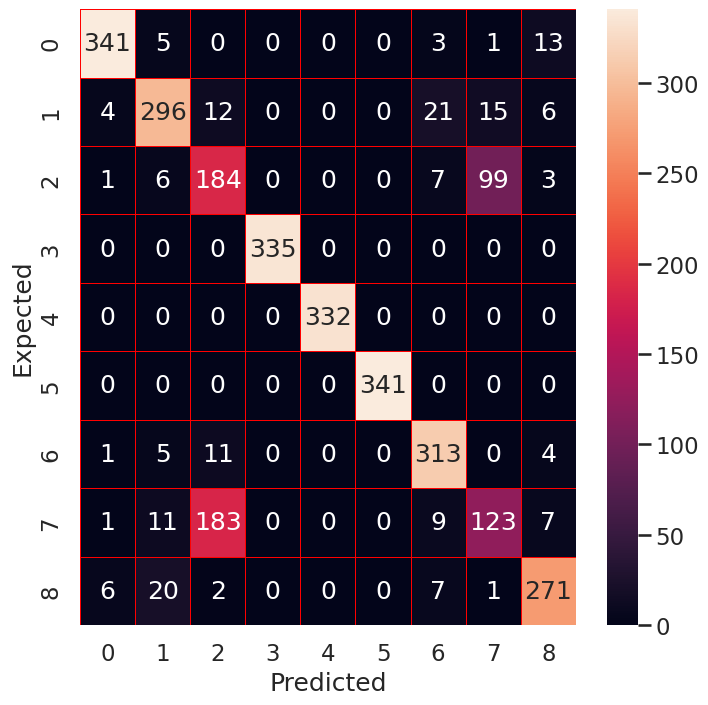

In [ ]:
cm= confusion_matrix(y_test, y_pred)
f, ax =plt.subplots(figsize = (8,8))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()